In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

Let's import the wine dataset first and go through a few features

In [55]:
wine_df = pd.read_csv(filepath_or_buffer="./data/winequality-red.csv", delimiter=";")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**The Wine Quality dataset contains information about the physicochemcial properties of the different types of red and white wines. It also helps to understand the perception of taste and quality of these wines by human and is labelled as "quality". Some of the key features of this dataset are as follows:**

1. **fixed acidity** - It helps to measure the quantity of tartaric acid. This is a fixed acid which helps to determine the taste and quality of wine.

2. **volatile acidity** - This measures the amount of volatile acids in the wine, which can contribute to a sour or vinegary taste if present in high amounts. Too much volatile acidity can indicate that the wine is spoiled or has undergone an unintended fermentation.

3. **citric acid** -  This is a type of fixed acid that can contribute to the flavor and freshness of the wine. It can also help to balance out other flavors and aromas in the wine.

4. **Residual sugar** - This refers to the amount of sugar that remains in the wine after fermentation has occurred. A higher residual sugar level can contribute to a sweeter taste, while a lower level can result in a drier wine.

5. **Chlorides** - These are salt compounds that can contribute to the taste and mouthfeel of the wine. In small amounts, they can enhance the flavor of the wine, but too much can result in a salty or briny taste.

6. **Free sulfur dioxide** -  This is a type of preservative that is added to wine to prevent oxidation and spoilage. It can also contribute to the wine's aroma and flavor.

7. **Total sulfur dioxide** - This measures the total amount of sulfur dioxide in the wine, including both free and bound forms. Too much sulfur dioxide can result in a harsh or sulfurous taste.

8. **Density** - This measures the mass of the wine per unit volume, which can provide information about its alcohol content and sugar concentration.

9. **pH** - This is a measure of the wine's acidity level on a scale of 0-14. A lower pH indicates a higher acidity level, while a higher pH indicates a lower acidity level.

10. **Alcohol content** - This refers to the percentage of alcohol in the wine, which can contribute to its body, aroma, and flavor.

Each of the above mentioned features play a key role in determining the taste and quality of the wine.

#### Let's try to get some feature extraction of the wine dataset based on the Mutual Information Gain of the different variables.

Mutual information(MI)between two random variables is a non-negative value,which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent ,and higher values mean higher dependency

In [56]:
from sklearn.model_selection import train_test_split

X = wine_df.drop(labels=["quality"], axis=1)
Y = wine_df["quality"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [57]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.04706568, 0.10212385, 0.05696975, 0.00846136, 0.04508585,
       0.        , 0.08832292, 0.06595753, 0.02757184, 0.10217997,
       0.19112347])

In [58]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

alcohol                 0.191123
sulphates               0.102180
volatile acidity        0.102124
total sulfur dioxide    0.088323
density                 0.065958
citric acid             0.056970
fixed acidity           0.047066
chlorides               0.045086
pH                      0.027572
residual sugar          0.008461
free sulfur dioxide     0.000000
dtype: float64

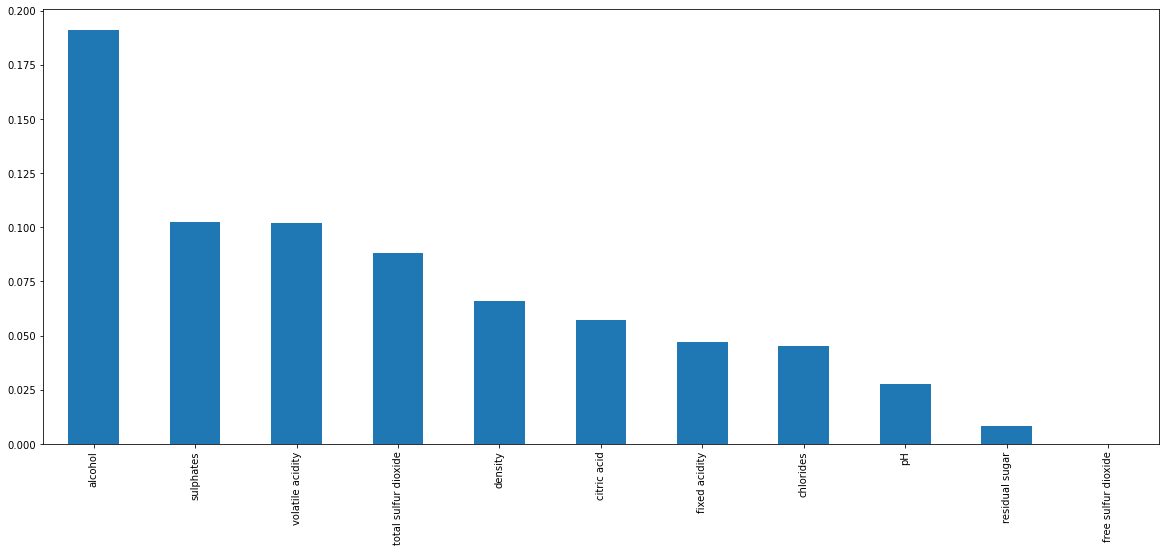

In [59]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()

So from the graph, we can observe that **alcohol** has the highest mutual information gain. We will use another Scikit Learn library to extract the top 5 features.

In [60]:
from sklearn.feature_selection import SelectKBest

selected_cols = SelectKBest(mutual_info_classif, k=5)
selected_cols.fit(X_train, Y_train)
X_train.columns[selected_cols.get_support()]

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')

#### So these are the top five features (volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol') that give the most information about the target variable.

## Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

Let's find out first the number of columns which have null data and along with that find out the numbe rof null values in each column

In [61]:
# Load the dataset and find out the number of null values
wine_df = pd.read_csv(filepath_or_buffer="./data/winequality-red.csv", delimiter=";")
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So from the above observation, we can conclude that there is no null data in the whole dataset.

#### Let's load another dataset which have missing values to check different sorts of imputation techniques

In [62]:
titanic_df = sns.load_dataset("titanic")

titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [63]:
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

So we can observe in the above dataset that there are a few varaibles which have missing values in them namely - **age, deck and embark_town**.

We are going to use **Scikit Learn** library to impute the missing values by mean, median or mode techniques in stead of dropping these values or columns completely as that might lead to loss of data.

#### Imputation by Mean

In [64]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy="mean")
mean_imputer.fit(titanic_df[["age"]])
age = mean_imputer.transform(titanic_df[["age"]])
age_df = pd.DataFrame(age, columns=["age"])

In [65]:
age_df["age"].isna().sum()

0

#### Imputation by Median

In [66]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy="median")
median_imputer.fit(titanic_df[["age"]])
median_age = median_imputer.transform(titanic_df[["age"]])
median_age_df = pd.DataFrame(median_age, columns=["age"])

In [67]:
median_age_df["age"].isna().sum()

0

#### Imputation by Mode

Let's impute the value of **embark_town** with mode since it is a categorical variable

In [68]:
titanic_df["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [69]:
titanic_df["embark_town"].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

So the mode should be **Southampton**. Let's verify:

In [70]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy="most_frequent")

mode_imputer.fit(titanic_df[["embark_town"]])
embark_town = mode_imputer.transform(titanic_df[["embark_town"]])
titanic_df["embark_town_new"] = embark_town

In [71]:
titanic_df["embark_town_new"].isna().sum()

0

In [72]:
titanic_df[titanic_df["embark_town"].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embark_town_new
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,Southampton
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,Southampton


So our observation is correct. Now let's discuss some of the advantages and disadvantages of the various imputation techniques:

1. **Mean/Median Imputation** - It is the most convenient way of imputing null values for numerical columns. But it should be used based on the domain knowledge and it can also introduce some biasing in case of imbalanced dataset. 

2. **Mode Imputation** - It is also an easy way to impute null values for categorical variables. But the disadvantage is that it also introduces biasing in the dataset.

3. **Iterative Imputation** - A sophisticated approach involves defining a model to predict each missing feature as a function of all other features and to repeat this process of estimating feature values multiple times. The repetition allows the refined estimated values for other features to be used as input in subsequent iterations of predicting missing values. This is generally referred to as iterative imputation. The disadvantage is that there can be multiple models that can be used to predict the missing values and hence we might need to do cross validations multiple times in order to verify the output.

4. **Nearest Neighbour Imputation** - The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from **n_neighbors nearest neighbors** that have a value for the feature. Disadvantage - When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform.

## Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

#### Load the student performance dataset

In [73]:
stud_df = pd.read_csv(filepath_or_buffer="./data/stud.csv")
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [74]:
stud_df.shape

(1000, 8)

There are 1000 students and 8 data columns. Out of these 8 columns, 3 are the scores on different subjects - math, reading, writing. Let's introduce a new data column called the **total_score** which represent the total marks each student earned.

In [75]:
stud_df["total_score"] = stud_df["math_score"] + stud_df["reading_score"] + stud_df["writing_score"]
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


#### Let's checkout the datatypes of the different columns as the statistical analysis will vary based on the data type

In [76]:
stud_df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
total_score                     int64
dtype: object

Some observation of the different columns based on the statistical analysis being donein previous assignments:

1. **gender** - Previous statistical analysis showed that gender has an impact on the result of the students. We can perform t-test or ANOVA to determine the relationship between gender of the students and the mean scores obtained by them.

2. **race_ethnicity** - As per previous analysis done, race ethnicity also has an impact on the scores of the students and similar statistical tools can be used as done for gender.

3. **parental_level_of_education** - Student having parents who obtained higher education tends to perform well in the exams. We could analyze the relationship between parental level of education and exam performance using a correlation analysis or multiple regression.

4. **lunch** - Studdents who received standard lunch tends to perform well as established by the t-test or ANOVA test earlier.

5. **test_preparation_course** - Students who have completed test preparation course tends to perform well in counterpart to their students who haven't completed them. The reason the students completing the curse are better prepared for the exams with their strategies. The same can be established using either t-test or ANOVA.

6. **math_score, reading_score, writing_score** - These three variables represent the individual subject scores of students on their exams. Wes could analyze the relationship between these variables and exam performance using correlation analyses or multiple regression.

7. **total_score** - This variable represents the combined score of all three subjects on the exam. We could analyze the relationship between total score and the other variables using a multiple regression.

#### Overall, there are a variety of statistical techniques that could be used to analyze the factors that impact students' performance on exams, including t-tests, ANOVAs, correlation analyses, and multiple regression. The choice of technique(s) would depend on the research questions and the specific variables of interest.

In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

cat_colums = list(stud_df.select_dtypes(include="object"))
all_cols = cat_colums + ["total_score"]

formula = "total_score ~ C(gender) + C(race_ethnicity) + C(parental_level_of_education) + C(lunch) + C(test_preparation_course)"
model = ols(formula, data=stud_df[all_cols]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(gender),3.075433e+04,1.0,21.919017,3.241173e-06
C(race_ethnicity),4.028761e+04,4.0,7.178378,1.068023e-05
C(parental_level_of_education),7.655039e+04,5.0,10.911694,3.082815e-10
C(lunch),1.577991e+05,1.0,112.465474,5.866484e-25
C(test_preparation_course),1.187781e+05,1.0,84.654713,2.062189e-19
Residual,1.384849e+06,987.0,NaN,NaN


Let's consider the confidence level at 95% which leads to alpha being 0.05.

Now with this alpha, we can observe that all the columns have p-value less than the alpha and hence we statistically reject the null hypothesis. That means - all the categorical columns have an impact on the scores of the students and hence we need to consider all of them while training the model.

#### Let's perform some statistical analysis on the numerical variables of the dataset. For the numerical variables we can find out the correlation matrix to understand the correaltionship between the different numerical variables.

In [78]:
spearman_corr = stud_df.corr(method="spearman")
spearman_corr

,math_score,reading_score,writing_score,total_score
math_score,1.000000,0.804064,0.778339,0.909191
reading_score,0.804064,1.000000,0.948953,0.968641
writing_score,0.778339,0.948953,1.000000,0.959184
total_score,0.909191,0.968641,0.959184,1.000000


Now since it is very difficult to follow these numbers to understand the correlation, lets visualize them using heatmap.

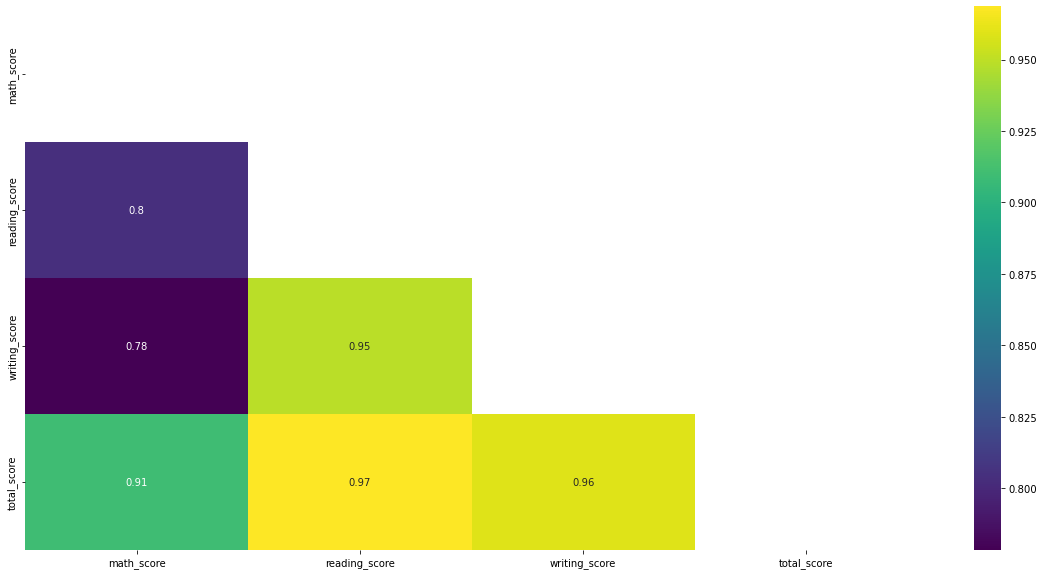

In [79]:
# Since the correlation matrix is a symmetric matrix, we can view either the upper half or the lower half to draw our observations.
# Here we will visualize the lower half of the matrix and put our observations forward.
plt.figure(figsize=(20,10))
mask = np.triu(np.ones(spearman_corr.shape))
sns.heatmap(spearman_corr, cmap="viridis", annot=True, mask=mask)
plt.show()

We can observe that students who have a good math_score, also tends to have good writing score and reading score. And the students who have good writing score tends to have a very good total score as well.

## Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

**Feature engineering** refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. In the context of the student performacne dataset, we would use feature engineering in order to transform the variables and extract the data to perform machine learning to predict the perforamnce of the students in various subjects of the exam.

#### Here are the few steps that can be taken in context of student performance dataset for feature engineering.

1. **Data Cleaning** - Even before we begin with building machine learning models, we need to clean the data by imputing the null vaues, discarding the outliers, removing the inconsistencies or duplicates in data.

2. **Feature Selection** - In the dataset, there could be a large number of variables and if we train the model on these large number of features, then there could be 2 problems mainly that will arise - one is overfitting the model with the training data and the other is time as it will not be optimized and consume a lot of time. We can perform PCA, correaltion matrix to understand the features that could be taken into consideration.

3. **Feature Transformation** - Feature transformation is simply a function that transforms features from one representation to another. The goal here is to plot and visualise data, if something is not adding up with the new features we can reduce the number of features used, speed up training, or increase the accuracy of a certain model.

4. **Feature Extraction** -  Feature extraction is the process of extracting features from a data set to identify useful information. Without distorting the original relationships or significant information, this compresses the amount of data into manageable quantities for algorithms to process.

5. **Exploratory Data Analysis** - Exploratory data analysis (EDA) is a powerful and simple tool that can be used to improve your understanding of your data, by exploring its properties. The technique is often applied when the goal is to create new hypotheses or find patterns in the data. It’s often used on large amounts of qualitative or quantitative data that haven’t been analyzed before.

In [80]:
stud_df = pd.read_csv("./data/stud.csv")
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [81]:
# Check for null data
stud_df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [82]:
# Check for duplicates in the dataset
stud_df.duplicated().sum()

0

#### So no null values or duplicates in the dataset.

In [83]:
# Feature engineering to create 2 new features called total_score and average which represent the total score and average score obtained by any student.
stud_df["total_score"] = stud_df["math_score"] + stud_df["reading_score"] + stud_df["writing_score"]
stud_df["average_score"] = stud_df["total_score"] / 3
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [84]:
# Let's assume the "average_score" as the target variable for this problem
X = stud_df.drop(labels=["math_score", "reading_score", "writing_score", "total_score"], axis=1)
Y = stud_df["average_score"]

In [85]:
# Separating categorical and numerical variables
cat_cols = list(stud_df.select_dtypes(include="object"))
num_cols = list(stud_df.select_dtypes(exclude="object"))

In [86]:
# Since Machine Learning models cannot work on categorical dataset, we need to encode each and every categorical column to numerical ones.
# For now, let's do One Hot Encoding which is a Nominal Encoding for all the categorical columns.
stud_df_encoded = pd.get_dummies(stud_df[cat_cols])
stud_df_encoded.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [87]:
# Train Test split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(stud_df_encoded, Y, test_size=0.3, random_state=42)
print(f"Training size:{X_train.shape}")
print(f"Test size:{X_test.shape}")

Training size:(700, 17)
Test size:(300, 17)


In [88]:
# Lets perform some scaling on this dataset before modelling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,-1.074172,1.074172,-0.297736,-0.477567,-0.692759,1.687055,-0.417728,1.882938,-0.379198,-0.497767,-0.242902,-0.542126,-0.457144,1.380060,-1.380060,1.350030,-1.350030
1,0.930949,-0.930949,-0.297736,-0.477567,1.443503,-0.592749,-0.417728,-0.531085,-0.379198,-0.497767,-0.242902,1.844591,-0.457144,-0.724606,0.724606,1.350030,-1.350030
2,-1.074172,1.074172,-0.297736,-0.477567,1.443503,-0.592749,-0.417728,-0.531085,-0.379198,-0.497767,-0.242902,1.844591,-0.457144,1.380060,-1.380060,-0.740724,0.740724
3,0.930949,-0.930949,-0.297736,-0.477567,-0.692759,1.687055,-0.417728,-0.531085,-0.379198,-0.497767,4.116882,-0.542126,-0.457144,1.380060,-1.380060,1.350030,-1.350030
4,0.930949,-0.930949,3.358676,-0.477567,-0.692759,-0.592749,-0.417728,-0.531085,-0.379198,-0.497767,-0.242902,1.844591,-0.457144,-0.724606,0.724606,1.350030,-1.350030


In [89]:
# Lets' scale the test data as well
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,0.930949,-0.930949,-0.297736,-0.477567,1.443503,-0.592749,-0.417728,1.882938,-0.379198,-0.497767,-0.242902,-0.542126,-0.457144,-0.724606,0.724606,-0.740724,0.740724
1,0.930949,-0.930949,-0.297736,2.093947,-0.692759,-0.592749,-0.417728,-0.531085,-0.379198,-0.497767,-0.242902,1.844591,-0.457144,1.380060,-1.380060,1.350030,-1.350030
2,-1.074172,1.074172,-0.297736,-0.477567,-0.692759,1.687055,-0.417728,-0.531085,2.637147,-0.497767,-0.242902,-0.542126,-0.457144,-0.724606,0.724606,-0.740724,0.740724
3,-1.074172,1.074172,-0.297736,-0.477567,1.443503,-0.592749,-0.417728,-0.531085,-0.379198,-0.497767,-0.242902,1.844591,-0.457144,1.380060,-1.380060,-0.740724,0.740724
4,-1.074172,1.074172,-0.297736,-0.477567,-0.692759,-0.592749,2.393903,-0.531085,-0.379198,-0.497767,-0.242902,1.844591,-0.457144,-0.724606,0.724606,1.350030,-1.350030


#### Now the dataset is ready to be modelled by Machine Learning algorithms

## Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [98]:
wine_df = pd.read_csv(filepath_or_buffer="./data/winequality-red.csv", delimiter=";")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
# Let's get some more info on the dataset
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


So all the columns are numerical columns and none of them have a null data entry. Let's verify that as well.

In [100]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [101]:
# Let's verify if it has any duplicate rows in the dataset
wine_df.duplicated().sum()

240

#### So, there are 240 duplicates, which need to removed.

In [102]:
# Before duplication
wine_df.shape

(1599, 12)

In [103]:
wine_df.drop_duplicates(keep="first", inplace=True)
# Size of the dataset after dropping the duplicates
wine_df.shape

(1359, 12)

In [105]:
# Let's create a util function to display the histogram and scatterplot for each of these features.
import scipy.stats as stat
def qqplot(df, feat):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(data=df[feat], kde=True)
    plt.title(f"Histogram Plot of the feature {feat}")
    plt.subplot(1,2,2)
    stat.probplot(df[feat], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of the feature {feat}")
    plt.show()

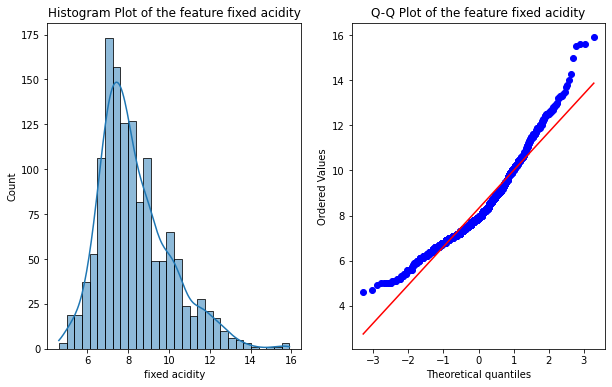

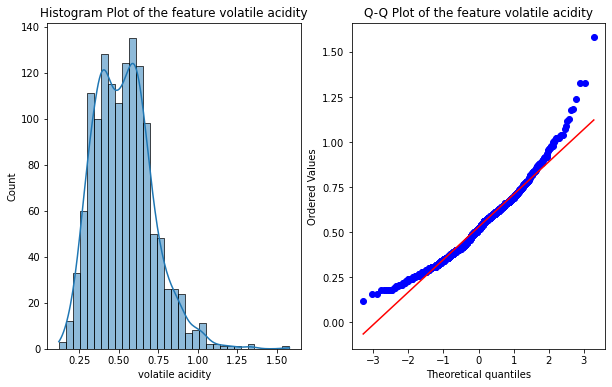

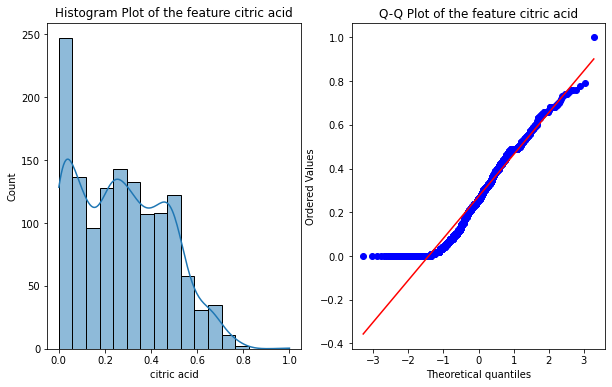

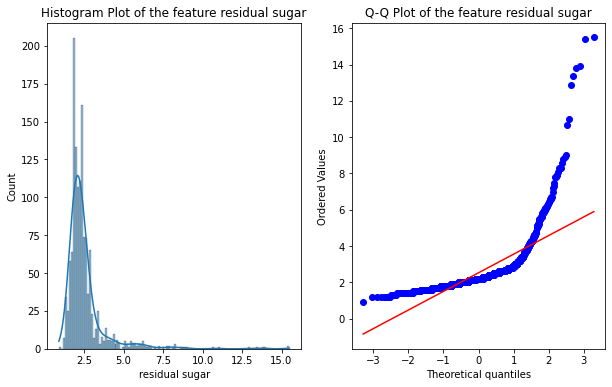

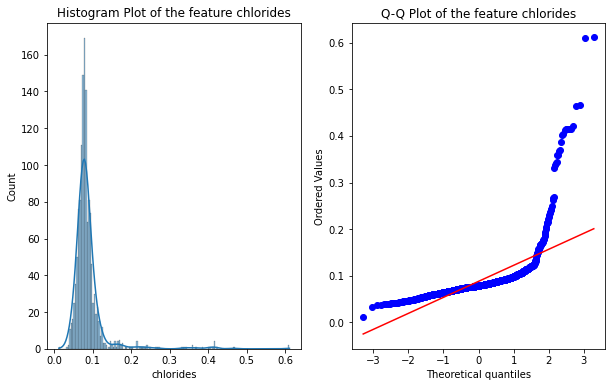

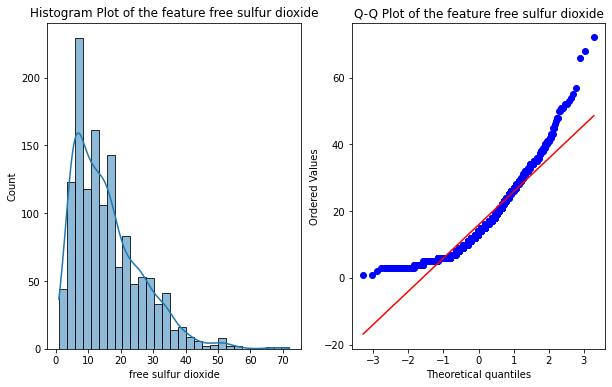

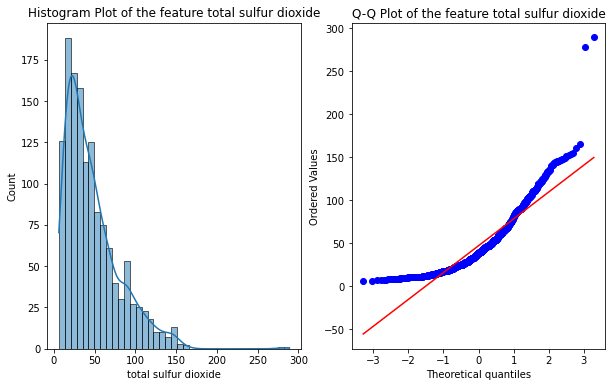

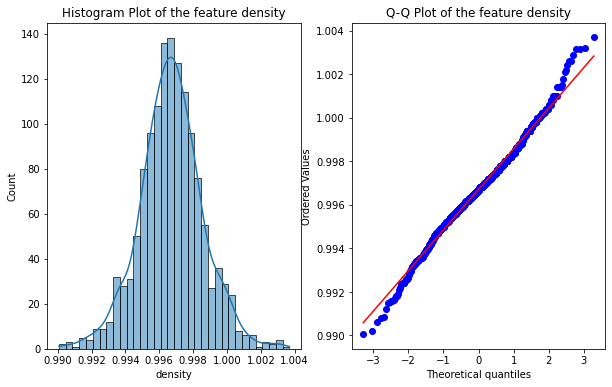

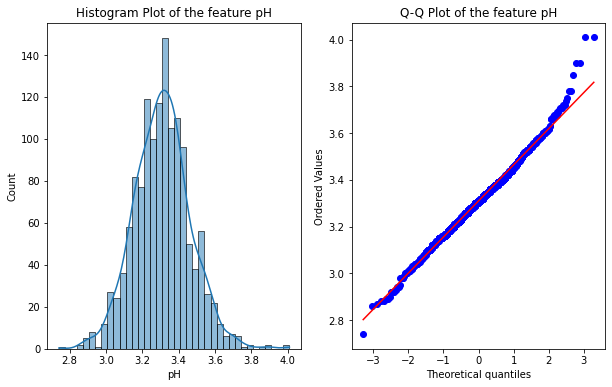

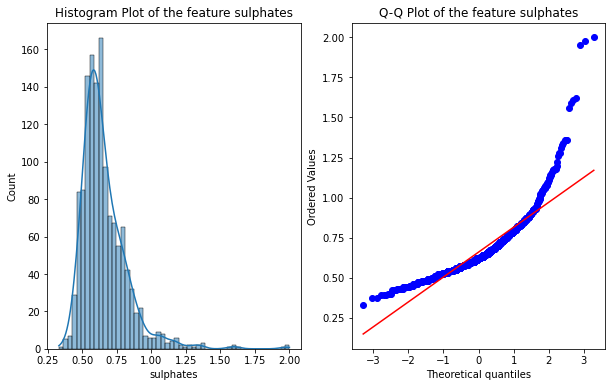

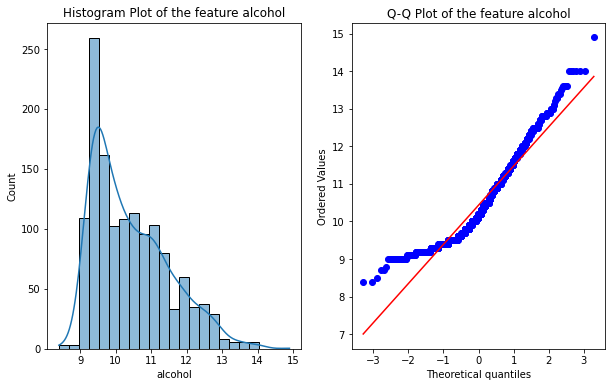

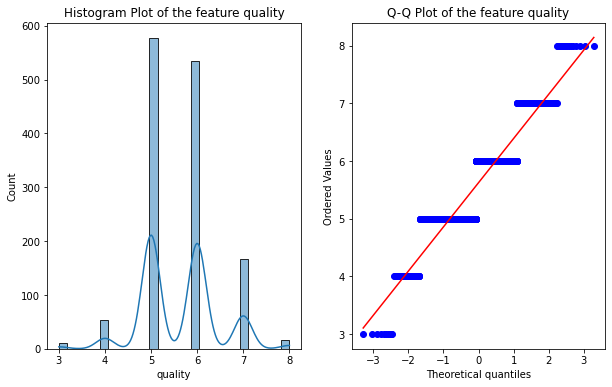

In [108]:
# Let's use the util function to create the plots for all the features in the wine dataset.
for col in wine_df.columns:
    qqplot(wine_df, col)

In [109]:
wine_df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

#### <u>Observations</u>

All the feaatures are Right Skewed in nature(Positive Skewed) except - **density, pH and quality** which are somewhat **Normally Distributed**

#### To improve the normality of the dataset for the rest of the columns, we can perform the below mentioned activities:

1. **Log Transformation** - This could be applied to the "residual sugar" feature to reduce the skewness.

2. **Square Root Transformation** - This could be applied to the "density" feature to reduce the skewness.

3. **Box Cox Transformation** - This is a more general transformation that can be used to transform a variety of non-normal distributions to normality. It involves finding the optimal lambda value that maximizes the log-likelihood of the data under a Box-Cox transformation. The Scipy library in Python provides a function for calculating the Box-Cox transformation.

#### It's important to note that not all non-normal distributions need to be transformed. In some cases, non-normality may not significantly impact the performance of a machine learning model, and therefore it may not be necessary to transform the data.

##  Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [156]:
# Let's load the wine dataset
wine_df = pd.read_csv(filepath_or_buffer="./data/winequality-red.csv", delimiter=";")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [157]:
# Let's drop the duplicates
wine_df.drop_duplicates(inplace=True, keep="first")
wine_df.shape

(1359, 12)

In [158]:
# Sseparating the features and target variables
X = wine_df.drop(labels=["quality"], axis=1)
Y = wine_df[["quality"]]

In [159]:
# Let's perform scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(wine_df)
wine_df = pd.DataFrame(scaler.transform(wine_df), columns=wine_df.columns)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374,-0.757040
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575,-0.757040
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575,-0.757040
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575,0.457621
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374,-0.757040


In [160]:
from sklearn.decomposition import PCA

# Let's define to keep the features which cover 90% of the variance of the dataset
var = 0.9
pca = PCA(var)
pca.fit(wine_df)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio of the 9 columns are: {explained_variance}")

Explained variance ratio of the 9 columns are: [0.26100983 0.1867395  0.13946427 0.10435684 0.08068005 0.0538768
 0.05147181 0.04149976]


In [161]:
total_explained_variance = explained_variance.sum()
print(f"Total Explained variance by all these 9 columns is: {total_explained_variance}")

Total Explained variance by all these 9 columns is: 0.9190988707937573


In [162]:
# Performing PCA on the features
X = pd.DataFrame(pca.transform(wine_df))
X.head()

,0,1,2,3,4,5,6,7
0,-1.766603,1.186903,-1.351484,-0.053316,0.139228,-1.000359,0.142542,0.035446
1,-0.949340,2.046605,0.059588,0.432896,0.254933,0.253027,-1.436909,-0.292970
2,-0.884805,1.391584,-0.663754,0.311548,0.123005,0.053433,-0.720138,-0.176824
3,2.405609,-0.205338,0.064907,-0.869784,-1.524963,-0.037512,0.214821,-0.149329
4,-1.725338,1.211033,-1.100199,-0.050252,-0.050171,-1.042927,0.221928,0.045055


#### As observed, the minimum number of features required to show the explained variance ratio as 90% is : 8